In [1]:
# load .pkl file and plot the data
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load importances

In [2]:
# load gray_clfs_importances.pkl
with open('gray_clfs_importances.pkl', 'rb') as file:
    gray_importances = pickle.load(file)

# load gray_clfs_importances.pkl
with open('rgb_clfs_importances.pkl', 'rb') as file:
    rgb_importances = pickle.load(file)
    
gray_importances = gray_importances[0]
rgb_importances = rgb_importances[0]

## Load test sets to get column names

In [3]:
rgb = pd.read_csv('RGB_test_features.csv', index_col=0)
gray = pd.read_csv('test_features.csv')

In [4]:
gray.head()

,Image,Mask,Category,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-2D_gldm_LargeDependenceLowGrayLevelEmphasis,lbp-2D_gldm_LowGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceEmphasis,lbp-2D_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-2D_gldm_SmallDependenceLowGrayLevelEmphasis,lbp-2D_ngtdm_Busyness,lbp-2D_ngtdm_Coarseness,lbp-2D_ngtdm_Complexity,lbp-2D_ngtdm_Contrast,lbp-2D_ngtdm_Strength
0,test\FAKE\0 (10).jpg,mask.jpg,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
1,test\FAKE\0 (2).jpg,mask.jpg,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
2,test\FAKE\0 (3).jpg,mask.jpg,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
3,test\FAKE\0 (4).jpg,mask.jpg,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0
4,test\FAKE\0 (5).jpg,mask.jpg,0,v3.0.1,1.25.2,2.3.1,1.5.0,3.10.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'Square': {}, ...",...,8.6875,1.0,0.119792,0.119792,0.119792,0.0,1000000.0,0.0,0.0,0.0


In [5]:
def drop_columns(df):
    to_drop = list()
    for column in df.columns:
        if df[column].min() == df[column].max():
            to_drop.append(column)
        elif 'diagnostics' in column:
            to_drop.append(column)
        elif column == "Mask" or column == "Image" or column == "Category":
            to_drop.append(column)
    df.drop(to_drop, axis=1, inplace=True)
    
    # We keep Image column for now to allow for image retrieval and visualization
    # # drop Image column
    # df.drop('Image', axis=1, inplace=True)        
    
# remove same columns as during training (additionally remove Image and Category column)         
drop_columns(rgb)
drop_columns(gray)

In [6]:
gray.columns

Index(['original_firstorder_10Percentile', 'original_firstorder_90Percentile',
       'original_firstorder_Energy', 'original_firstorder_Entropy',
       'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
       'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean',
       'original_firstorder_Median',
       ...
       'lbp-2D_firstorder_InterquartileRange', 'lbp-2D_firstorder_Kurtosis',
       'lbp-2D_firstorder_MeanAbsoluteDeviation', 'lbp-2D_firstorder_Mean',
       'lbp-2D_firstorder_Median',
       'lbp-2D_firstorder_RobustMeanAbsoluteDeviation',
       'lbp-2D_firstorder_RootMeanSquared', 'lbp-2D_firstorder_Skewness',
       'lbp-2D_firstorder_TotalEnergy', 'lbp-2D_firstorder_Variance'],
      dtype='object', length=741)

## Importance analysis

### Top 10

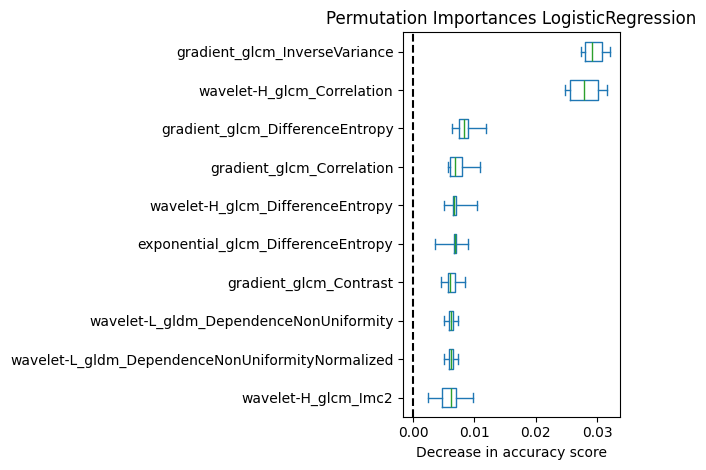

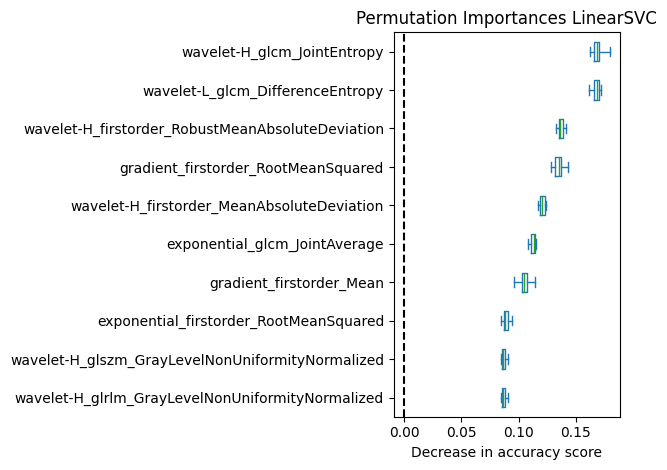

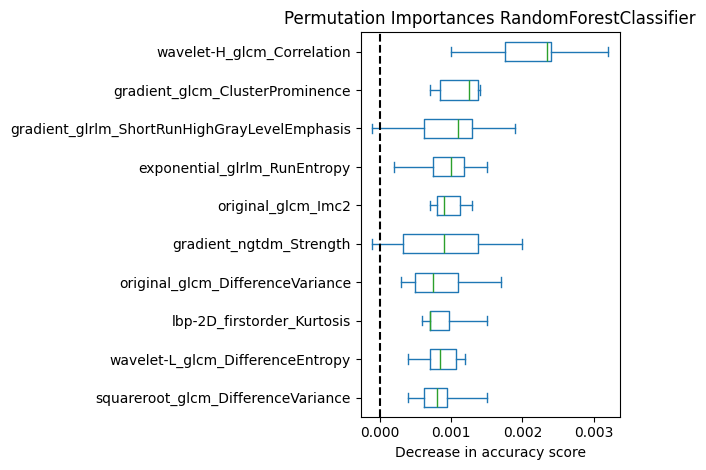

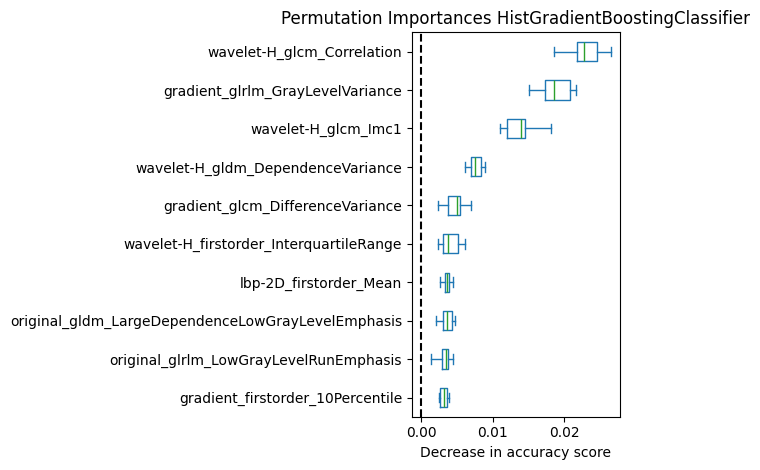

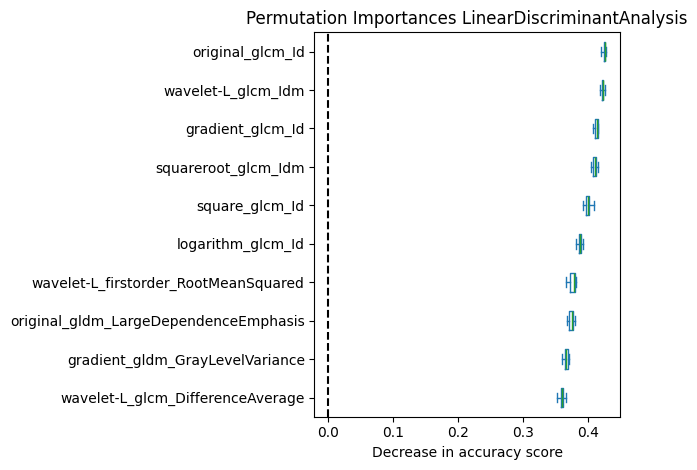

In [7]:
clfs_importances = dict()

def plot_importances(clfs_importances, X):
    for name, result in clfs_importances.items():
        try:
            sorted_importances_idx = result.importances_mean.argsort()[-10:]
            importances = pd.DataFrame(
                result.importances[sorted_importances_idx].T,
                columns=X.columns[sorted_importances_idx],
            )
            ax = importances.plot.box(vert=False, whis=10)
            ax.set_title(f"Permutation Importances {name}")
            ax.axvline(x=0, color="k", linestyle="--")
            ax.set_xlabel("Decrease in accuracy score")
            ax.figure.tight_layout()
            plt.show()
        except Exception as e:
            print(f"During processing {name}. Exception: {e} occurred.")
            
plot_importances(gray_importances, gray)

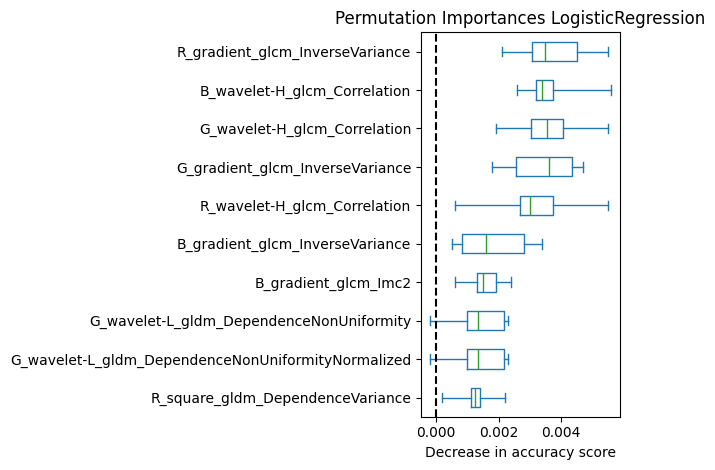

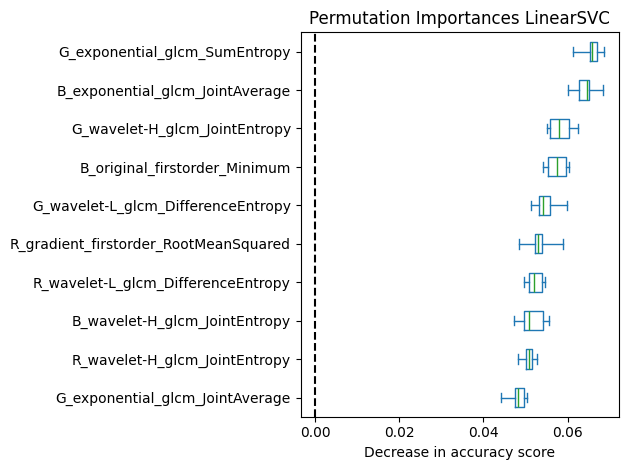

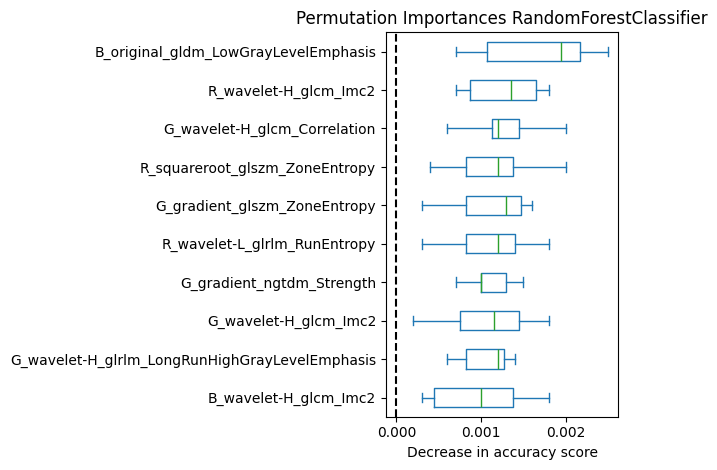

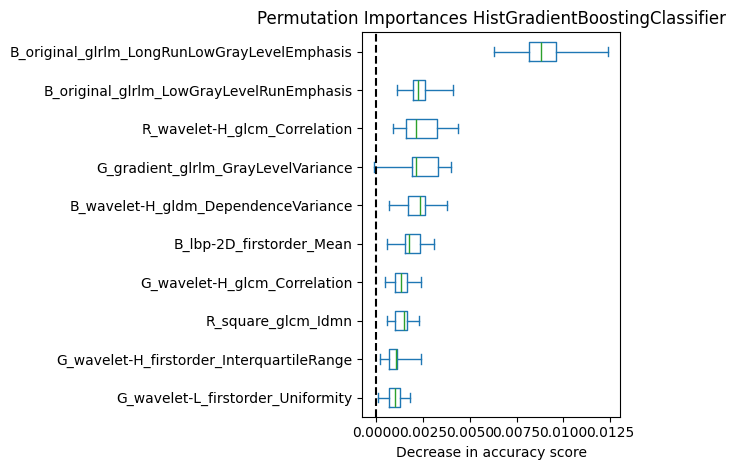

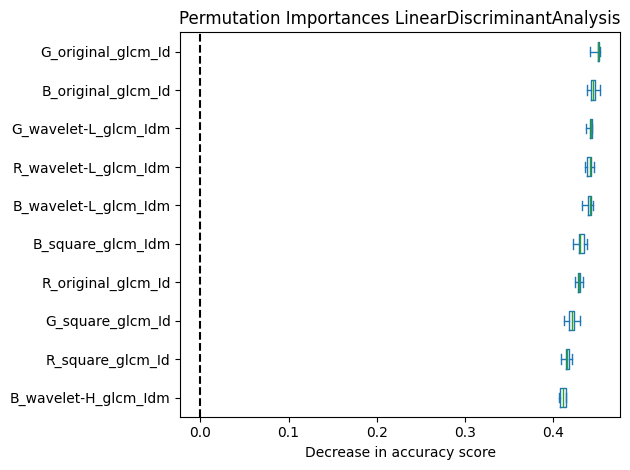

In [8]:
plot_importances(rgb_importances, rgb)

### Best feature classes  by classifer

In [90]:
feature_classes = ["shape2D", "firstorder", "glcm", "glrlm", "glszm", "gldm", "ngtdm"]

In [91]:
def get_avg_importance(feature_characteristics, clfs_importances, X):
    # feature_characteristic is a string that is part of the column name
    # e.g. "shape2D" is part of "shape2D_Sphericity" 
    
    importances_dct = dict()
    for name, result in clfs_importances.items():        
        importances_mean = pd.DataFrame(
            result.importances_mean.reshape(1, -1),
            columns=X.columns,
        )
        
        importances_dct[name] = dict()
        for feature_characteristic in feature_characteristics:
            class_columns = [column for column in importances_mean.columns if feature_characteristic in column]
            class_importances = importances_mean[class_columns]
            avg_importances = class_importances.mean(axis=1)
            importances_dct[name][feature_characteristic] = avg_importances
        
        importances_dct[name] = pd.DataFrame(importances_dct[name])
            
            
    return importances_dct
            
gray_avg_importances_dct = get_avg_importance(feature_classes, gray_importances, gray)
rgb_avg_importances_dct = get_avg_importance(feature_classes, rgb_importances, rgb)

In [92]:
def reformat_avg_importances(importances_dct, characteristic="FeatureClass", importance="Importance"):
    # reformat data for plotting
    for name, df in importances_dct.items():
        # Transpose the DataFrame
        df_transposed = df.T
        # Reset the index to convert the index into a regular column
        df_transposed.reset_index(inplace=True)
        # Rename columns to characteristic, importance, e.g. 'FeatureClass' and 'Importance'
        df_transposed.columns = [characteristic, importance] 
        importances_dct[name] = df_transposed

reformat_avg_importances(gray_avg_importances_dct)
reformat_avg_importances(rgb_avg_importances_dct)

gray_avg_importances_dct["HistGradientBoostingClassifier"]

,FeatureClass,Importance
0,shape2D,NaN
1,firstorder,0.000148
2,glcm,0.000332
3,glrlm,0.000267
4,glszm,0.000000
5,gldm,0.000143
6,ngtdm,0.000100


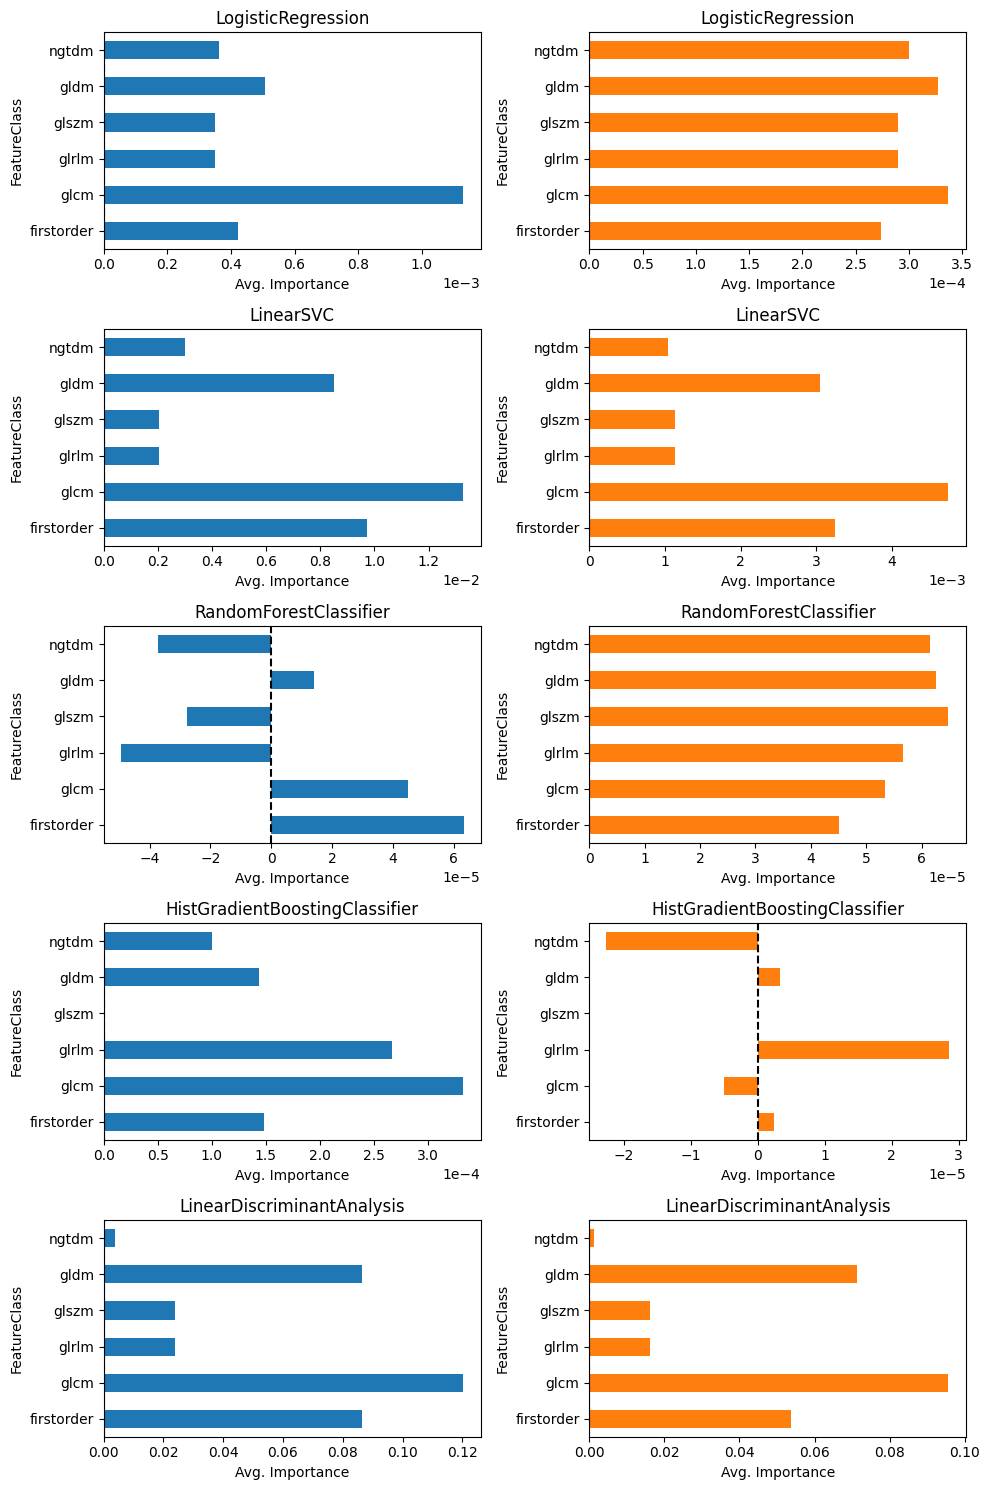

In [93]:
def plot_avg_importances(ax, avg_importances_dct, color='skyblue', characteristic="FeatureClass", importance="Importance"):
    # plot average importances for each classifcation model, show feature names on x-axis
    # use subplots to show all models in one figure
    # one figure for gray and one for rgb
    
    for i, (name, df) in enumerate(avg_importances_dct.items()):
        df = df.dropna()
        df.plot(kind='barh', x=characteristic, y=importance, ax=ax[i], title=name, color=color)
        # make smaller spaces between bars
        # ax[i].margins(x=0.1)
        # disable legend
        ax[i].legend().set_visible(False)
        # set x-axis label
        ax[i].set_xlabel("Avg. Importance")
        # enable scientific notation for x-axis
        ax[i].ticklabel_format(style='sci', axis='x', scilimits=(-2,2))
        # add vertical line at 0
        ax[i].axvline(x=0, color="k", linestyle="--")

    plt.tight_layout()       
    return ax

fig, ax = plt.subplots(5, 2, figsize=(10, 15))
plot_avg_importances(ax[:, 0], gray_avg_importances_dct, color='tab:blue')
plot_avg_importances(ax[:, 1], rgb_avg_importances_dct, color='tab:orange')
plt.show()

### Best image types by classifier

In [94]:
image_types = ["original", "wavelet", "square", "squareroot", "logarithm", "exponential", "gradient", 'lbp2d']


In [95]:
rgb_avg_importances_dct = dict()
gray_avg_importances_dct = dict()

rgb_avg_importances_dct = get_avg_importance(image_types, rgb_importances, rgb)
gray_avg_importances_dct = get_avg_importance(image_types, gray_importances, gray)

In [96]:
reformat_avg_importances(gray_avg_importances_dct, characteristic="ImageType", importance="Importance")
reformat_avg_importances(rgb_avg_importances_dct, characteristic="ImageType", importance="Importance")

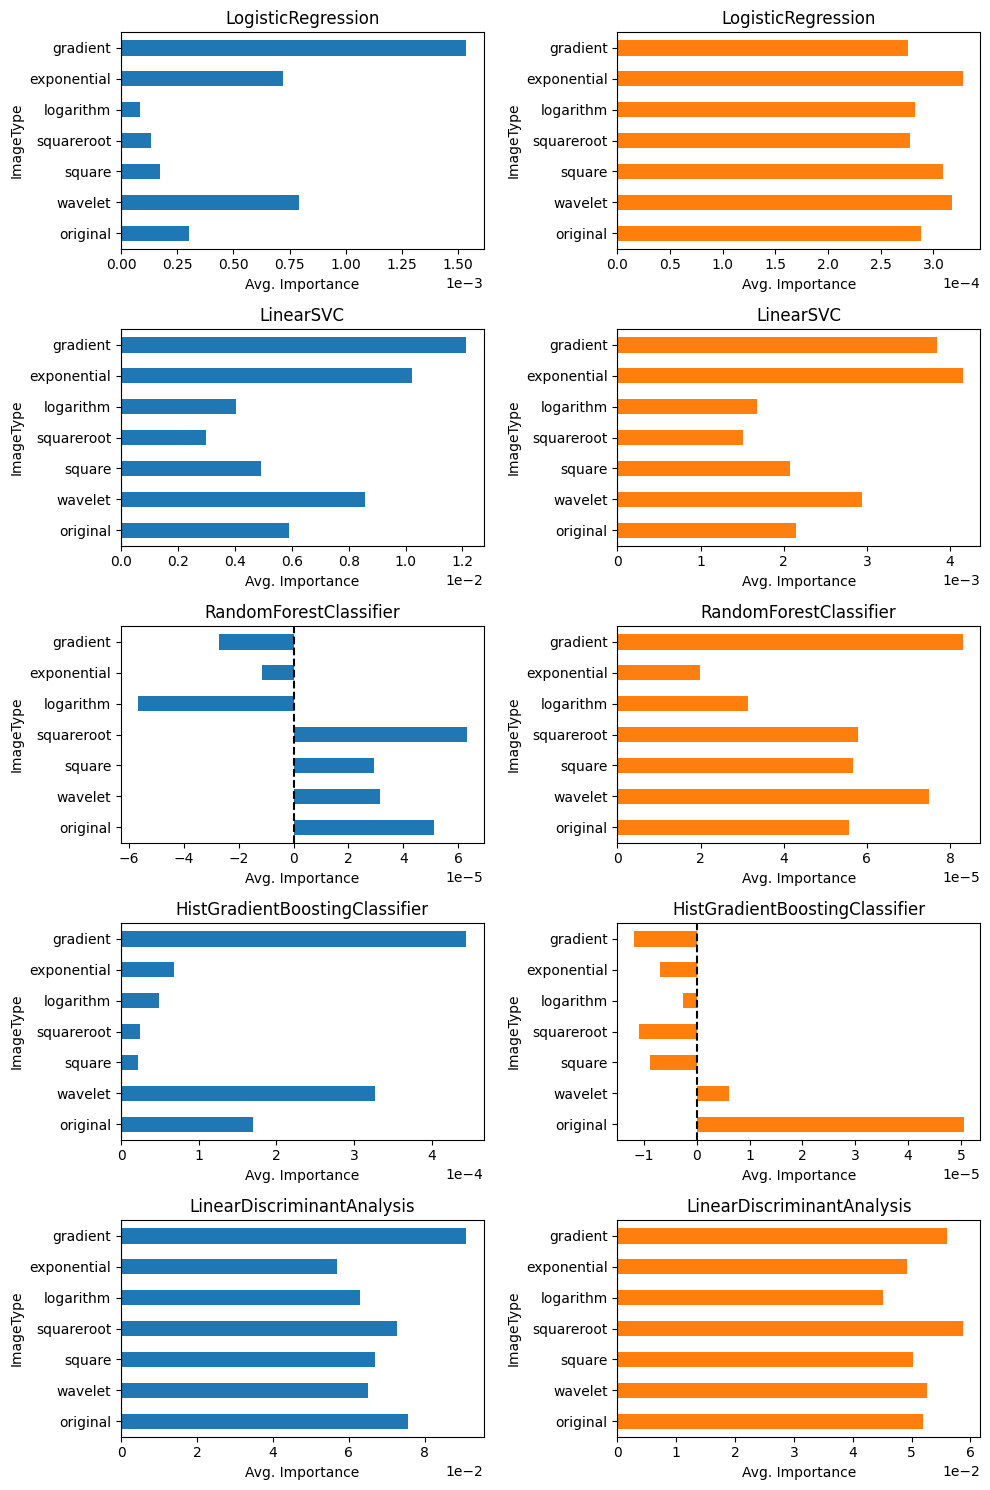

In [98]:
fig, ax = plt.subplots(5, 2, figsize=(10, 15))
plot_avg_importances(ax[:, 0], gray_avg_importances_dct, color='tab:blue', characteristic="ImageType", importance="Importance")
plot_avg_importances(ax[:, 1], rgb_avg_importances_dct, color='tab:orange', characteristic="ImageType", importance="Importance")
plt.show()